In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
from graphviz import Digraph
def trace(root):
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root, format='svg', rankdir='LR'):
    """
    format: png | svg | ...
    rankdir: TB (top to bottom graph) | LR (left to right)
    """
    assert rankdir in ['LR', 'TB']
    nodes, edges = trace(root)
    dot = Digraph(format=format, graph_attr={'rankdir': rankdir}) #, node_attr={'rankdir': 'TB'})
    
    for n in nodes:
        dot.node(name=str(id(n)), label = "{ data %.4f  }" % (n.data, n.grad), shape='record')
        if n._op:
            dot.node(name=str(id(n)) + n._op, label=n._op)
            dot.edge(str(id(n)) + n._op, str(id(n)))
    
    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
    
    return dot

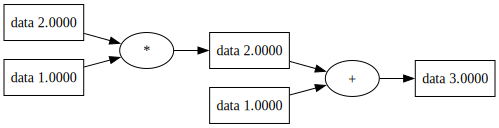

In [43]:
# a very simple example
x = Value(1.0)
y = x * 2 + 1

draw_dot(y)43444 

In [210]:
class Value:
    def __init__(self,data,_children=(),_op = '',label =''):
        self.data = data
        self._prev = set(_children)
        self._op = _op
        self.grad = 0.0
        self.label = label

    def __add__(self,other):
        other = other if isinstance(other,Value) else Value(other)
        return Value(self.data + other.data,(self,other),"+")
        
    def __mul__(self,other):
        other = other if isinstance(other,Value) else Value(other)
        return Value(self.data * other.data,(self,other),"*")
        

    def __radd__(self,other):
        return self + other
    
    def __rmul__(self, other):
        return self * other
    
    def __repr__(self) -> str:
        return f"Value(data={self.data})"

In [216]:
a = Value(2.0, label = 'a')
b = Value(-3.0 , label= 'b')
c = Value(10.0, label='c')
e = a*b ; e.label ='e'
d = e + c;d.label = 'd'
f = Value(-2,label='f')
L = d*f; L.label ='L'


In [225]:

def draw_dot(root):
    node = [] 
    edges = []
    def nodes(root):
        node.append(root)
        for child in root._prev:
            edges.append((child,root))
            nodes(child)
    nodes(root)

    dot = Digraph(format='svg',graph_attr={'rankdir': 'LR'}) #, node_attr={'rankdir': 'LR'})
    
    for n in node:
        # dot.node(name=str(id(n)), label = f"Data {n.data}| grad {n.grad}",shape = 'record')
        dot.node(name=str(id(n)), label = "{%s |Data %.4f | grad %.4f}" % (n.label,n.data,n.grad),shape = 'record')

        
        if n._op:
            dot.node(name=str(id(n))+n._op, label = f"{n._op}")
            dot.edge(str(id(n))+n._op,str(id(n)))
    for i,k in edges:
        dot.edge(str(id(i)),str(id(k))+k._op)
    
    return dot
    


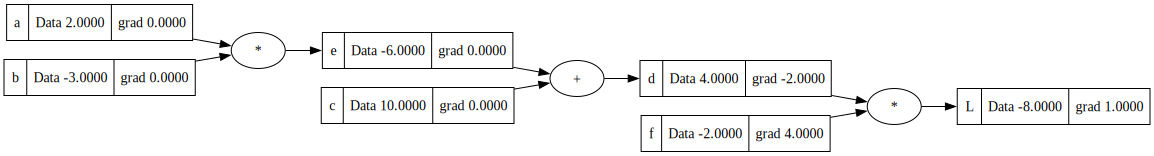

In [229]:
draw_dot(L)
#https://github.com/linexjlin/GPTs/tree/main/prompts

In [228]:
L.grad =1 
d.grad = -2
f.grad = 4

In [227]:
L = d*f

dL/dd = f
dL/df = d

SyntaxError: cannot assign to expression here. Maybe you meant '==' instead of '='? (503532471.py, line 2)

In [222]:
def lol():
    h = 0.00001
    a = Value(2.0, label = 'a')
    b = Value(-3.0 , label= 'b')
    c = Value(10.0, label='c')
    e = a*b ; e.label ='e'
    d = e + c;d.label = 'd'
    f = Value(-2,label='f')
    L = d*f; L.label ='L'
    L1 = L.data

    a = Value(2.0, label = 'a')
    b = Value(-3.0 , label= 'b')
    c = Value(10.0, label='c')
    e = a*b ; e.label ='e'
    d = e + c;d.label = 'd'
    f = Value(-2,label='f')
    L = d*f; L.label ='L'
    L2 = L.data +h 

    print((L2- L1)/h)

lol()

0.9999999999621422
